In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Membaca data set
df = pd.read_csv('stock_data.csv')

# Mengonversi kolom 'Date' menjadi selisih hari dari tanggal awal
df['Date'] = pd.to_datetime(df['Date'])
df['Days_from_start'] = (df['Date'] - df['Date'].min()).dt.days

# Pisahkan fitur dan label
X = df[['Days_from_start', 'Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Adj Close']

In [ ]:
df=pd.read_csv('stock_data.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2018-11-20,44.592499,45.367500,43.877499,44.244999,42.466824,271300800,AAPL
1,2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000,AMZN
2,2018-11-20,127.029999,134.160004,126.849998,132.429993,132.429993,41939500,META
3,2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500,TSLA
4,2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418831,124496800,AAPL


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
5023,2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900,AAPL
5024,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,META
5025,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700,AAPL
5026,2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMZN
5027,2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800,TSLA


In [ ]:
df.shape

(5028, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')

**Check overview of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5028 non-null   object 
 1   Open       5028 non-null   float64
 2   High       5028 non-null   float64
 3   Low        5028 non-null   float64
 4   Close      5028 non-null   float64
 5   Adj Close  5028 non-null   float64
 6   Volume     5028 non-null   int64  
 7   Company    5028 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 314.4+ KB


In [ ]:
df['Date'].value_counts()

2018-11-20    4
2022-03-17    4
2022-03-28    4
2022-03-25    4
2022-03-24    4
             ..
2020-07-23    4
2020-07-22    4
2020-07-21    4
2020-07-20    4
2023-11-17    4
Name: Date, Length: 1257, dtype: int64

In [ ]:
df['Open'].value_counts()

190.000000    5
200.000000    4
206.699997    4
162.500000    3
131.000000    3
             ..
156.250000    1
96.692497     1
154.913498    1
239.630005    1
232.000000    1
Name: Open, Length: 4717, dtype: int64

In [ ]:
df['High'].value_counts()

175.000000    4
166.600006    4
165.000000    4
174.300003    4
124.400002    3
             ..
246.050003    1
162.029007    1
99.250000     1
111.666664    1
237.389999    1
Name: High, Length: 4723, dtype: int64

In [ ]:
df['Low'].value_counts()

162.800003    3
198.050003    3
210.000000    3
124.129997    3
147.679993    3
             ..
97.733330     1
237.860001    1
99.333336     1
147.422501    1
226.539993    1
Name: Low, Length: 4745, dtype: int64

In [ ]:
df['Close'].value_counts()

172.070007    3
175.839996    3
125.980003    3
122.769997    3
166.649994    3
             ..
95.919998     1
245.070007    1
102.976669    1
95.752502     1
234.300003    1
Name: Close, Length: 4805, dtype: int64

In [ ]:
df['Adj Close'].value_counts()

125.980003    3
135.360001    3
184.509995    3
265.279999    3
225.089996    2
             ..
154.995499    1
239.869995    1
106.155334    1
241.750000    1
234.300003    1
Name: Adj Close, Length: 4922, dtype: int64

In [ ]:
df['Volume'].value_counts()

63346000     2
62782000     2
103416000    2
63804000     2
66128000     2
            ..
21771800     1
113138000    1
89001600     1
82084000     1
142532800    1
Name: Volume, Length: 5010, dtype: int64

In [ ]:
df['Company'].value_counts()

AAPL    1257
AMZN    1257
META    1257
TSLA    1257
Name: Company, dtype: int64

**Check Null data for each columns**

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

# Regression Task

Regression with Decision Tree

In [ ]:

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pilih algoritma Decision Tree Regressor
model = DecisionTreeRegressor()

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.3966166071760268
R-squared: 0.9999455824028294


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)

# Visualize the decision tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("DecisionTreeVisualization")  # Save the visualization to a file
graph.view("DecisionTreeVisualization")  # Open the visualization in a new tab


'DecisionTreeVisualization.pdf'

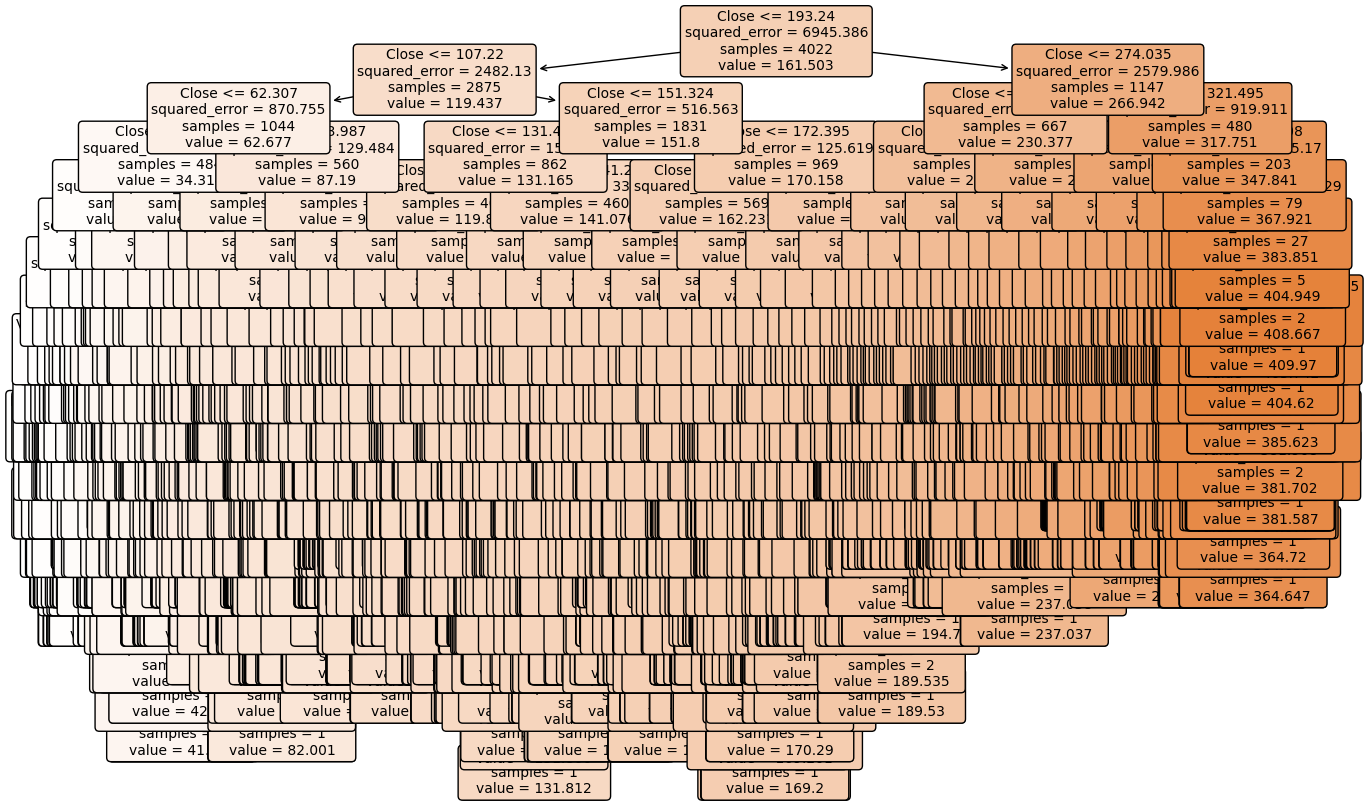

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained your model as per your code
# Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()


Regression with KNN

In [ ]:


# Lakukan scaling pada fitur
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Pilih algoritma K-Nearest Neighbors Regressor
k_value = 5  # Ganti dengan nilai K yang diinginkan
model = KNeighborsRegressor(n_neighbors=k_value)

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 31.053516916832347
R-squared: 0.9957393166505478


Regression with Linear Regression

In [ ]:
# Lakukan scaling pada fitur
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Pilih algoritma Linear Regression
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.4318781972782903
R-squared: 0.9999407443527552
